In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
import tensorflow as tf
import tensorflow_probability as tfp
from scipy.integrate import simps
# tf.enable_eager_execution()


## Distribution
$$p(\sigma) = \mathcal{N(0, 3)}$$
$$p(\alpha_i) = \Pi_i \mathcal{N(0, {\rm exp}(\sigma/2))}$$

In [4]:
# Target distribution is proportional to: `exp(-x (1 + x))`.
normal = tfp.distributions.Normal

def log_prob(x):
    if len(x.shape) > 1:
        yp = normal(0, 3).log_prob(x[:, 0])
        xp = tf.reduce_sum(tf.stack([normal(0, tf.exp(x[:, 0]/2.)).log_prob(x[:, i]) for i in range(1, x.shape[1])], 1), 1)
    else:
        yp = normal(0, 3).log_prob(x[0])
        xp = tf.reduce_sum([normal(0, tf.exp(x[0]/2.)).log_prob(x[i]) for i in range(1, x.shape[0])])
    return yp + xp



In [5]:
sigmarep = np.random.normal(0,3,100000000)
yvrep = np.random.normal(0,1,100000000)
alpharep = np.exp(sigmarep/2.)*yvrep
# hh = plt.hist2d(sigmarep, alpharep, bins=100, density=True)[0]

In [6]:
alpharep.std()

9.394427656605192

In [7]:
plt.plot(sigmarep, alpharep, '.', alpha=0.5)
plt.ylim(-100, 100)

(-100.0, 100.0)

Error in callback <function flush_figures at 0x7fe450088f70> (for post_execute):


KeyboardInterrupt: 

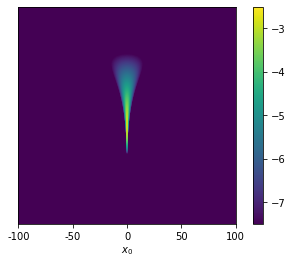

<ipython-input-8-8e00dcf4ac8b>:17: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  im = plt.pcolormesh(xtrue, ytrue, np.exp(ptrue), cmap="viridis", vmin=0, vmax=0.01)


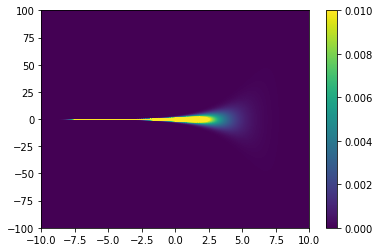

In [8]:
fig, ax = plt.subplots()
r = 2000
x, v = np.meshgrid(np.linspace(-20, 20, r).astype(float32), np.linspace(-9, 9, r).astype(float32))
x, v = np.meshgrid(np.linspace(-100, 100, r).astype(float32), np.linspace(-10, 10, r).astype(float32))
xx = np.stack([v.flatten(), x.flatten()]).T
logp2 = log_prob(xx).numpy()
im = ax.imshow(logp2.reshape(r, r), vmin=-7.5, vmax=-2.5, cmap="viridis", origin="lower")
plt.colorbar(im)
ax.set_yticks([])
ax.set_yticklabels([])
ax.set_xticks(np.linspace(0, r-1, 5))
ax.set_xticklabels(np.linspace(x.min(), x.max(), 5).astype(int))
ax.set_xlabel("$x_0$")
plt.show()

xtrue, ytrue, ptrue = v, x, logp2.reshape(r, r)
im = plt.pcolormesh(xtrue, ytrue, np.exp(ptrue), cmap="viridis", vmin=0, vmax=0.01)
plt.colorbar(im)

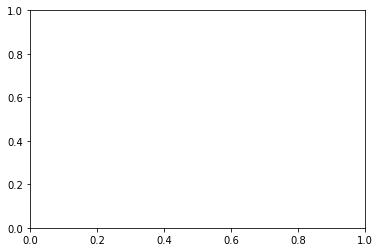

In [9]:
fig, ax = plt.subplots()
r = 20000
x, v = np.meshgrid(np.linspace(-20, 20, r).astype(float32), np.linspace(-9, 9, r).astype(float32))
# x, v = np.meshgrid(np.linspace(-100, 100, r).astype(float32), np.linspace(-10, 10, r).astype(float32))
x, v = np.meshgrid(np.linspace(-10000, 10000, r).astype(float32), np.linspace(-15, 15, r).astype(float32))
xx = np.stack([v.flatten(), x.flatten()]).T
logp2 = log_prob(xx).numpy()
# im = ax.imshow(logp2.reshape(r, r), vmin=-7.5, vmax=-2.5, cmap="viridis", origin="lower")
# plt.colorbar(im)
# ax.set_yticks([])
# ax.set_yticklabels([])
# ax.set_xticks(np.linspace(0, r-1, 5))
# ax.set_xticklabels(np.linspace(x.min(), x.max(), 5).astype(int))
# ax.set_xlabel("$x_0$")
# plt.show()

xtrue2, ytrue2, ptrue2 = v, x, logp2.reshape(r, r)
# im = plt.pcolormesh(xtrue, ytrue, np.exp(ptrue), cmap="viridis", vmin=0, vmax=0.01)
# plt.colorbar(im)

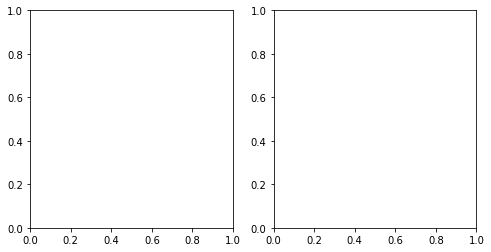

In [10]:
sigmarginal = np.trapz(np.exp(ptrue), ytrue, axis=1)
alpmarginal = np.trapz(np.exp(ptrue), xtrue, axis=0)
sigmarginalcdf = np.cumsum(sigmarginal)/np.cumsum(sigmarginal)[-1]
xsigmarginal = xtrue[:, 0]
xalpmarginal, alpmarginalcdf = ytrue[0, :], np.cumsum(alpmarginal)/np.cumsum(alpmarginal)[-1]

sigmarginal2 = np.trapz(np.exp(ptrue2), ytrue2, axis=1)
alpmarginal2 = np.trapz(np.exp(ptrue2), xtrue2, axis=0)

xsigmarginal2, sigmarginalcdf2 = xtrue2[0, :], np.cumsum(sigmarginal2)/np.cumsum(sigmarginal2)[-1]
xalpmarginal2, alpmarginalcdf2 = ytrue2[0, :], np.cumsum(alpmarginal2)/np.cumsum(alpmarginal2)[-1]

fig, ax = plt.subplots(1, 2, figsize=(8, 4))
# ax[0].plot(xtrue[:, 0], np.cumsum(sigmarginal)/np.cumsum(sigmarginal)[-1])
# ax[1].plot(xalpmarginal, alpmarginalcdf)

# ax[0].plot(xtrue2[:, 0], np.cumsum(sigmarginal2)/np.cumsum(sigmarginal2)[-1], '--')
# ax[1].plot(ytrue2[0, :], np.cumsum(alpmarginal2)/np.cumsum(alpmarginal2)[-1], '--')

# ax[0].set_xlim(-5, 5)
# ax[1].set_xlim(-5, 5)

In [11]:
print(xalpmarginal2[np.where(alpmarginalcdf2 > 0.05)[0][0]], xalpmarginal2[np.where(alpmarginalcdf2 > 0.95)[0][0]])
stdalpha = (simps(xalpmarginal2**2*alpmarginal2, xalpmarginal2))**0.5
stdalpha, alpharep.std()

-6.500325 6.500325


(9.379714797518778, 9.394427656605192)

In [12]:
((exp(1.5**2) -1)*exp(1.5**2))**0.5

8.973817218116451

In [13]:
nchains = 20
ndim = 4
initstate = tf.random.uniform([nchains, ndim+1], -1., 1. )
initstate;

In [14]:
# Initialize the HMC transition kernel.
num_results = int(1e3)
num_burnin_steps = int(1e3)
adaptive_hmc = tfp.mcmc.SimpleStepSizeAdaptation(
    tfp.mcmc.HamiltonianMonteCarlo(
        target_log_prob_fn=log_prob,
        num_leapfrog_steps=30,
        step_size=1.),
    num_adaptation_steps=int(num_burnin_steps * 0.8))

# Run the chain (with burn-in).
@tf.function
def run_chain():
    # Run the chain (with burn-in).
    samples, is_accepted = tfp.mcmc.sample_chain(
      num_results=num_results,
      num_burnin_steps=num_burnin_steps,
      current_state= initstate,
      kernel=adaptive_hmc,
#         trace_fn=lambda _, pkr: pkr.inner_results.is_accepted, 
        trace_fn=lambda _, pkr: [pkr.inner_results.is_accepted,
                                 pkr.inner_results.accepted_results.step_size,
                             pkr.inner_results.log_accept_ratio],
        parallel_iterations=20)

    return samples, is_accepted


In [19]:
# # Initialize the HMC transition kernel.
# num_results = int(10e3)
# num_burnin_steps = int(1e3)
# hmc = tfp.mcmc.HamiltonianMonteCarlo(
#         target_log_prob_fn=log_prob,
#         num_leapfrog_steps=30,
#         step_size=0.1)

# # Run the chain (with burn-in).
# @tf.function
# def run_chain():
#     # Run the chain (with burn-in).
#     samples, is_accepted = tfp.mcmc.sample_chain(
#       num_results=num_results,
#       num_burnin_steps=num_burnin_steps,
#       current_state= initstate,
#       kernel=hmc,
# #         trace_fn=lambda _, pkr: pkr.inner_results.is_accepted, 
#         trace_fn=lambda _, pkr: [pkr.is_accepted,
#                                  pkr.accepted_results.step_size,
#                              pkr.log_accept_ratio],
#         parallel_iterations=20)

#     return samples, is_accepted


In [20]:
start = time.time()
samples, is_accepted = run_chain()
print(time.time()-start)

tfsamples = samples.numpy()

6.814128875732422


In [21]:
print('step size : ', np.unique(is_accepted[1].numpy()))
is_accepted[2]
p_accept = tf.math.exp(tfp.math.reduce_logmeanexp(
    tf.minimum(is_accepted[2], 0.)))
p_accept

step size :  [0.4166001]


<tf.Tensor: shape=(), dtype=float32, numpy=0.71243644>

<ipython-input-22-594443c7e57a>:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[2].pcolormesh(xtrue, ytrue, (ptrue), cmap="viridis", vmin=-7, vmax=-2)


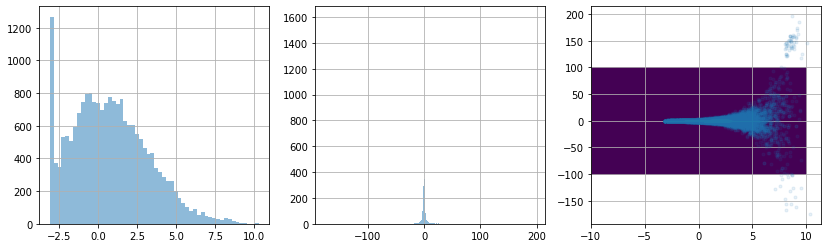

In [22]:
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].hist(tfsamples[...,0].flatten(), bins='auto', alpha=0.5)
ax[1].hist(tfsamples[...,1].flatten(), bins='auto', alpha=0.5)
# ax[2].pcolormesh(xtrue, ytrue, np.exp(ptrue) , vmin=0, vmax=0.1, cmap="viridis")
ax[2].pcolormesh(xtrue, ytrue, (ptrue), cmap="viridis", vmin=-7, vmax=-2)
ax[2].plot(tfsamples[...,0].flatten(), tfsamples[...,1].flatten(),'.', alpha=0.1)
for axis in ax: axis.grid(which='both')

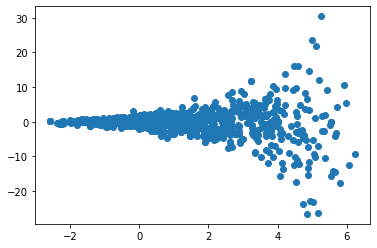

In [23]:
plt.scatter(tfsamples[:, 0, 0], tfsamples[:, 0, 1])

<ipython-input-24-7e2a04e905fb>:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(xtrue, ytrue, (ptrue), cmap="viridis", vmin=-7, vmax=-2)


(-20.0, 20.0)

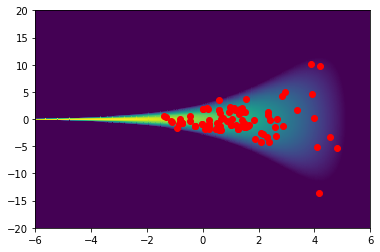

In [24]:
plt.pcolormesh(xtrue, ytrue, (ptrue), cmap="viridis", vmin=-7, vmax=-2)
plt.scatter(tfsamples[:100, 0, 0], tfsamples[:100, 0, 1], color='r')
plt.xlim(-6, 6)
plt.ylim(-20, 20)

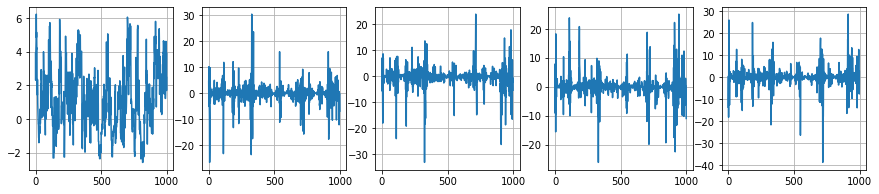

In [25]:
fig, ax = plt.subplots(1, ndim+1, figsize=(15, 3))
for i in range(len(ax)):
    ax[i].plot(tfsamples[:, 0, i])
    ax[i].grid()

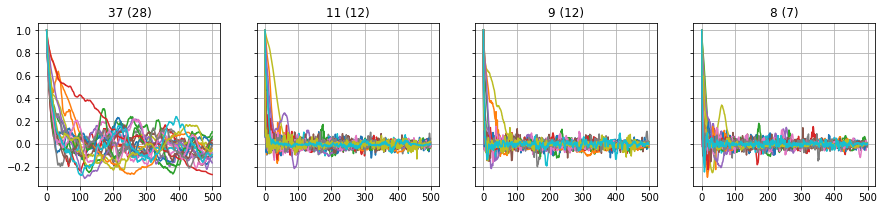

In [26]:
fig, ax = plt.subplots(1, ndim, figsize=(15, 3), sharex=True, sharey=True)
for i in range(len(ax)):
    x = tfsamples[...,i]
    xp = (x - x.mean(axis=0))/x.std(axis=0)
    rcc = np.array([np.correlate(xp[:, i], xp[:, i], mode='full') for i in range(xp.shape[1])])
    rcc = rcc[:, rcc.shape[1]//2:].T
    rcc /= rcc[0]
    ax[i].plot(rcc[:500])
    ax[i].grid()
    #
    tcc = []
    for j in range(x.shape[1]):
        for m in range(500):
            if m > 5*(1 + 2*rcc[:m, j].sum()): break
        tcc.append((1 + 2*rcc[:m, j].sum()))
    tcc = np.array(tcc)
    ax[i].set_title('%d (%d)'%(tcc.mean(), tcc.std()))

# My HMC 


In [27]:
# @tf.function
# def leapfrog_steps(N, q, p, step_size, V, K):
#     toret = []
#     for i in range(N):
#         g0 = get_grads(V, q)
#         phalf = p - 0.5*step_size * g0[1]
#         q1 = q + step_size * get_grads(K, phalf)[1]
#         g1 = get_grads(V, q1)
#         p1 = phalf - 0.5*step_size * g1[1]
#         toret.append([[q, q1], [p, phalf,p1], [g0, g1]])
#         p = p1
#         q = q1
#     return q, p, toret



In [50]:
# def unnormalized_log_prob2(q):
#     x, y = q[0], q[1]
#     return  -y**2 / 9. -x **2/(tf.exp(y))**2
# def unnormalized_log_prob(x):
#     return -x - x**2.

V = lambda x: -1* log_prob(x)

@tf.function
def KE(p):
    print(p.shape)
    return 0.5 * tf.reduce_sum(p**2)


@tf.function
def H(q,p):
    return V(q) + KE(p)

@tf.function
def get_grads(f, x):
    with tf.GradientTape() as tape:
        tape.watch(x)
        fv = f(x)
    grad = tape.gradient(fv, x)
    return fv, grad
    

@tf.function
def leapfrog(N, q, p, step_size, V, K):
    p = p - 0.5*step_size * get_grads(V, q)[1]
    for i in range(N-1):
        q = q + step_size * get_grads(K, p)[1]
        p = p - step_size * get_grads(V, q)[1]
    q = q + step_size * get_grads(K, p)[1]
    p = p - 0.5*step_size * get_grads(V, q)[1]
    return q, p


@tf.function
def metropolis(qp0, qp1, H):
    q0, p0 = qp0
    q1, p1 = qp1
    H0 = H(q0, p0)
    H1 = H(q1, p1)
    prob = tf.minimum(1., tf.exp(H0 - H1))
    if tf.math.is_nan(prob): 
        return q0, p0, 2.
    if tf.random.uniform([1], maxval=1.) > prob:
        return q0, p0, 0.
    else: return q1, p1, 1.

    
    


In [265]:
step_size = 0.1
Nleapfrog = 10 
nsamples, burnin = 10000, 1000
mysamples = []
myis_accepted = []
q = tf.constant([1., 1.])
# q = tf.constant([1.])
p = tf.random.normal(shape=q.shape)
V(q), KE(p), H(q, p);
nparallel = 10
nchains = 20



In [244]:
# samples = tf.TensorArray(dtype=tf.float32, size=nsamples)
# i = tf.constant(0)


# # @tf.function
# # def step(q):
# #     q = tf.map_fn(hmc_step, q, parallel_iterations=nparallel)
# #     return q

# @tf.function
# def hmc_step(q, step_size=step_size):
#     p = tf.random.normal(shape=q.shape)
#     q1, p1 = leapfrog(Nleapfrog, q, p, step_size, V, KE)
#     q, p, accepted = metropolis([q, p], [q1, p1], H)
#     return q


# def hmc_body(i, q, samples):
#     q = tf.map_fn(hmc_step, q, parallel_iterations=nparallel)
#     samples = samples.write(i, q)
#     return i+1, q, samples

# def cond(i, q, samples):
#     return tf.less(i, tf.constant(nsamples))

# start = time.time()
# i, q, mysamples = tf.while_loop(cond, hmc_body, [i, initstate, samples], parallel_iterations=nparallel)
# end = time.time()
# print(end - start)
# mysamples = mysamples.stack().numpy()

In [266]:
samples = tf.TensorArray(dtype=tf.float32, size=nsamples)
i = tf.constant(0)

@tf.function
def hmc_step(q, step_size=step_size):
    p = tf.random.normal(shape=q.shape)
    q1, p1 = leapfrog(Nleapfrog, q, p, step_size, V, KE)
    q, p, accepted = metropolis([q, p], [q1, p1], H)
    return q


@tf.function
def hmc_body(q):
#     q = tf.vectorized_map(hmc_step, q)
    q = tf.map_fn(hmc_step, q)
    return q

q = initstate
_ = hmc_body(q)

start = time.time()
for i in range(nsamples):
    q = hmc_body(q)
    samples = samples.write(i, q)
end = time.time()

print(end - start)
mysamples = samples.stack().numpy()



102.99319672584534


# Delayed

In [246]:
# step_size = 0.5

# @tf.function
# def hmc_reverse(j, q, p):
#     probs = tf.TensorArray(dtype=tf.float32, size=j)
#     H0 = H(q, p)
#     for jj in range(j):
#         print(jj)
#         jstep = step_size / 2**jj
#         jNleap = Nleapfrog * 2**jj
#         print(jstep, jNleap)
#         q1, p1 = leapfrog(jNleap, q, p, jstep, V, KE)
#         H1 = H(q1, p1)
#         probs = probs.write(jj, min(1, tf.exp(H0 - H1))
#     return probs.stack()
    
    
# q = initstate[0:1]
# p = tf.random.normal(shape=q.shape)
# probs = hmc_reverse(2, q, p)
# print(probs, tf.reduce_prod(1-probs))

In [247]:
# @tf.function
# def hmc_step(j, q, p, H0, prob):
#     jstep = step_size / 2**j
#     jNleap = Nleapfrog * 2**j
#     q1, p1 = leapfrog(jNleap, q, p, jstep, V, KE)
#     H0 = H(q, p)
#     H1 = H(q1, p1)
#     jprob = tf.exp(H0 - H1)
#     if j == 1:
#         return jprob
#     else:
#         return prob*(1-jprob)
    
    
#     accepted = False
#     j = 0
#     probs = tf.zeros(nhalves)
#     H0 = H(q, p)
#     while ~accepted and j < nhalves:
#         jstep = step_size / 2**j
#         jNleap = Nleapfrog * 2**j
#         q1, p1 = leapfrog(jNleap, q, p, jstep, V, KE)
#         H1 = H(q1, p1)
#         jprob = tf.exp(H0 - H1)
#         rprobs = hmc_reverse(j, q, -p)
#         if tf.math.is_nan(prob): 
#             accepted = False
#             j = j+1
#         elif tf.random.uniform([1], maxval=1.) > min(1, jprob):
#             accepted = False
#             j = j+1
#         else : q = q1
#     return q, probs


In [267]:
samples2 = tf.TensorArray(dtype=tf.float32, size=nsamples)
i = tf.constant(0)

# @tf.function
# def hmc_reverse(j, q, p):
#     probs = tf.zeros(j)
#     H0 = H(q, p)
#     for jj in range(j):
#         print(jj)
#         jstep = step_size / 2**jj
#         jNleap = Nleapfrog * 2**jj
#         print(jstep, jNleap)
#         q1, p1 = leapfrog(jNleap, q, p, jstep, V, KE)
#         H1 = H(q1, p1)
#         probs[jj] = tf.exp(H0 - H1)
#     return probs
    
    
two_factor = 2
    
@tf.function
def hmc_step2step(q, step_size=step_size):
    p = tf.random.normal(shape=q.shape)
    accepted = False
    q1, p1 = leapfrog(Nleapfrog, q, p, step_size, V, KE)
    H0 = H(q, p)
    H1 = H(q1, p1)
    prob1 = tf.exp(H0 - H1)
    prob1 = tf.minimum(1., prob1)
    if tf.math.is_nan(prob1): 
        accepted = False
    elif tf.random.uniform([1], maxval=1.) > prob1:
        accepted = False
    else: accepted = True
    if accepted:
        return q1
    else: 
        q2, p2 = leapfrog(Nleapfrog*two_factor, q, p, step_size/two_factor, V, KE)
        H2 = H(q2, p2)
        prob2 = tf.exp(H0 - H2)
        q21, p21 = leapfrog(Nleapfrog, q2, -p2, step_size, V, KE)
        H21 = H(q21, p21)
        prob21 = tf.exp(H2 - H21)
        prob21 = tf.minimum(1., prob21)
        prob = prob2 * (1-prob21)/(1-prob1)
        if tf.math.is_nan(prob):
            return q
        if tf.random.uniform([1], maxval=1.) > tf.minimum(1., prob):
            return q
        else:
            return q2
        

@tf.function
def hmc_body2(q):
#     q = tf.vectorized_map(hmc_step2step, q)
    q = tf.map_fn(hmc_step2step, q, fn_output_signature=tf.float32)
    return q


q = initstate
# _ = hmc_body2(q)

start = time.time()
for i in range(nsamples):
    q = hmc_body2(q)
    samples2 = samples2.write(i, q)
end = time.time()

print(end - start)
mysamples2 = samples2.stack().numpy()



172.4099509716034


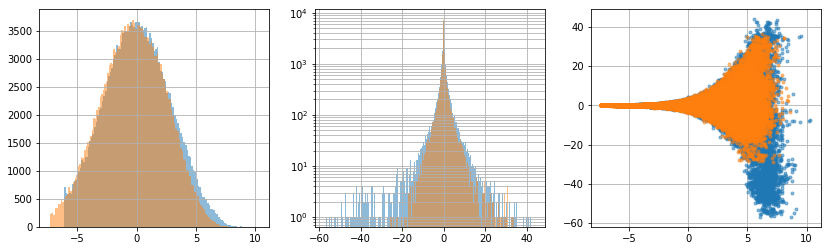

In [268]:
ii = 1
fig, ax = plt.subplots(1, 3, figsize=(14, 4))
ax[0].hist(mysamples[...,0].flatten(), bins='auto', alpha=0.5)
ax[1].hist(mysamples[...,ii].flatten(), bins='auto', alpha=0.5)
ax[1].set_yscale('log')
ax[2].plot(mysamples[...,0].flatten(), mysamples[...,1].flatten(),'.', alpha=0.5)

ax[0].hist(mysamples2[...,0].flatten(), bins='auto', alpha=0.5)
ax[1].hist(mysamples2[...,ii].flatten(), bins='auto', alpha=0.5)
ax[1].set_yscale('log')
ax[2].plot(mysamples2[...,0].flatten(), mysamples2[...,1].flatten(),'.', alpha=0.5)
for axis in ax: axis.grid(which='both')

In [238]:
# step_size = 0.5    
@tf.function
def hmc_step2step(q, step_size=step_size):
    p = tf.random.normal(shape=q.shape)
    accepted = False
    q1, p1 = leapfrog(Nleapfrog, q, p, step_size, V, KE)
    H0 = H(q, p)
    H1 = H(q1, p1)
    prob1 = tf.exp(H0 - H1)
    prob1 = tf.minimum(1., prob1)
    print(prob1)
    if tf.math.is_nan(prob1): 
        accepted = False
    elif tf.random.uniform([1], maxval=1.) > prob1:
        accepted = False
    else: accepted = True
    if accepted:
        return q1, 1., prob1, prob1, prob1
    else: 
        q2, p2 = leapfrog(Nleapfrog*5, q, p, step_size/5., V, KE)
        H2 = H(q2, p2)
        prob2 = tf.exp(H0 - H2)
        q21, p21 = leapfrog(Nleapfrog, q2, -p2, step_size, V, KE)
        H21 = H(q21, p21)
        prob21 = tf.exp(H2 - H21)
        prob21 = tf.minimum(1., prob21)
        prob = prob2 * (1-prob21)/(1-prob1)
        if tf.random.uniform([1], maxval=1.) > prob:
            return q, 0., prob1, prob2, prob21
        else:
            return q2, 2., prob1, prob2, prob21
#             return q2,  H0, H1, H2, H21
        

i = tf.zeros((q.shape[0], 1))
@tf.function
def hmc_body2(q):
#     q = tf.vectorized_map(hmc_step2step, q)
    print(q)
    q, acc, p1, p2, p21 = tf.map_fn(hmc_step2step, q, fn_output_signature=(tf.float32, tf.float32, tf.float32, tf.float32, tf.float32), 
                      dtype=tf.float32)
    return q, acc, p1, p2, p21


q = initstate
# _ = hmc_body2(q)

start = time.time()
ll = []
lp = []
for i in range(1000):
    q, acc, p1, p2, p21 = hmc_body2(q)
    ll.append(q)
    lp.append([acc, p1, p2, p21])
end = time.time()

print(end - start)



Tensor("q:0", shape=(20, 5), dtype=float32)
Tensor("Minimum:0", shape=(), dtype=float32)
42.63393568992615


In [239]:
lp = np.array(lp)

In [240]:
lp[:20,..., 0]

array([[1.0000000e+00, 8.6708426e-01, 8.6708426e-01, 8.6708426e-01],
       [1.0000000e+00, 9.7642612e-01, 9.7642612e-01, 9.7642612e-01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [0.0000000e+00, 4.0691349e-01, 9.8399144e-01, 1.0000000e+00],
       [1.0000000e+00, 8.7485468e-01, 8.7485468e-01, 8.7485468e-01],
       [1.0000000e+00, 9.9457788e-01, 9.9457788e-01, 9.9457788e-01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.9296576e-01, 9.9296576e-01, 9.9296576e-01],
       [1.0000000e+00, 6.0794830e-01, 6.0794830e-01, 6.0794830e-01],
       [1.0000000e+00, 9.4589472e-01, 9.4589472e-01, 9.4589472e-01],
       [1.0000000e+00, 9.9826580e-01, 9.9826580e-01, 9.9826580e-01],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 1.0000000e+00, 1.0000000e+00, 1.0000000e+00],
       [1.0000000e+00, 9.8725313e-

In [229]:
np.unique(lp[:, 2][(lp[:, 1] - lp[:, 2] ) !=0])

array([0.0000000e+00, 8.2415073e-32, 2.2702468e-31, ...,           nan,
                 nan,           nan], dtype=float32)